In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
from matplotlib import cm
import matplotlib as mpl
from cycler import cycler
from matplotlib import rc
import scipy.stats
from sklearn.metrics import explained_variance_score
from sklearn.metrics import roc_auc_score, roc_curve
from tqdm import tnrange

In [6]:
true_mean = np.mean(np.load("/scratch/yjk27/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy"))
true = np.load("/scratch/yjk27/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy")[-20:,:50000]
true_train = np.load("/scratch/yjk27/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy")[:20,:50000]
gru_test = np.load("/scratch/yjk27/CA1_clust4-60/whole/gru_s10_h20_output.npz")["test"] + true_mean
tcn_test = np.load("/scratch/yjk27/CA1_clust4-60/whole/tcnmulti_l3_h40_output.npz")["test"] + true_mean
tcn_train = np.load("/scratch/yjk27/CA1_clust4-60/whole/tcnmulti_l3_h40_train_output.npz")["test"] + true_mean

gru_error = true - gru_test
tcn_error = true - tcn_test
diff = np.load("/scratch/yjk27/CA1_clust4-60/data/V_diff_stimseed1_set1.npy")[-20*50000:].reshape(-1,50000)

comb_pred = np.load("/scratch/yjk27/CA1_clust4-60_AP/comb_pred/gru_l20_h40_0.2ms_test.npy").reshape((20,-1))
whole_pred = np.load("/scratch/yjk27/CA1_clust4-60_AP/whole_pred/gru_l20_h40_0.2ms_test.npy").reshape((20,-1))
tcn_pred = np.load("/scratch/yjk27/CA1_clust4-60_AP/tcnmulti_pred/gru_l20_h40_0.2ms_test.npy").reshape((20,-1))
spk = np.load("/scratch/yjk27/CA1_clust4-60_AP/data/spike_train_0.2ms.npy")[980*50000:].reshape((20,-1))

In [7]:
var_exp_array = np.zeros((3,20))

for i in range(20):
    var_exp_array[0,i] = explained_variance_score(true[i], gru_test[i])
    var_exp_array[1,i] = explained_variance_score(true[i], tcn_test[i])
    var_exp_array[2,i] = explained_variance_score(true_train[i], tcn_train[i])
    
thresh_bin_no = 250
bin_no = 250    
gru_error_diff, gru_diff_bins, gru_error_bins = np.histogram2d(diff.flatten(), gru_error.flatten(), bins=40)
tcn_error_diff, tcn_diff_bins, tcn_error_bins = np.histogram2d(diff.flatten(), tcn_error.flatten(), bins=40)

rocarea_array = np.zeros((20,3))
for i in tnrange(20):
    rocarea_array[i,0] = roc_auc_score(spk[i], comb_pred[i])
    rocarea_array[i,1] = roc_auc_score(spk[i], whole_pred[i])
    rocarea_array[i,2] = roc_auc_score(spk[i], tcn_pred[i])

<ipython-input-7-87bc42368049>:14: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(20):


  0%|          | 0/20 [00:00<?, ?it/s]

<ipython-input-13-19a9b50323a1>:67: RuntimeWarning: divide by zero encountered in log10
  im4 = ax4.imshow(np.flipud(np.log10(gru_error_diff).T), extent=[gru_diff_bins[0], gru_diff_bins[-1],
<ipython-input-13-19a9b50323a1>:83: RuntimeWarning: divide by zero encountered in log10
  im5 = ax5.imshow(np.flipud(np.log10(tcn_error_diff).T), extent=[tcn_diff_bins[0], tcn_diff_bins[-1],
<ipython-input-13-19a9b50323a1>:163: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
<ipython-input-13-19a9b50323a1>:165: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.savefig("/scratch/yjk27/dendrite/fig_tcn/fig_tcn_raw.pdf", bbox_inches="tight", transparent=True)
/scratch/yjk27/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figu

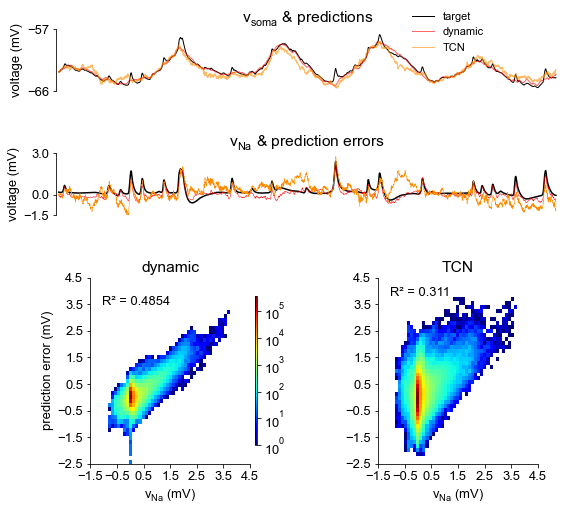

In [13]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = '13'

fig = plt.figure(constrained_layout=True, figsize = (9,8))
gs = fig.add_gridspec(4,2, wspace=0.5, hspace=1)
ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1,:])
#ax3 = fig.add_subplot(gs[:2,6:])
ax4 = fig.add_subplot(gs[2:,0])
ax5 = fig.add_subplot(gs[2:,1])
#ax3 = fig.add_subplot(gs[2:,6:])

ax1.plot(np.arange(0,0.6,1/5000), true[-2][22000:25000], linewidth=1, color="black", label="target")
ax1.plot(np.arange(0,0.6,1/5000), gru_test[-2][22000:25000], linewidth=1, color="red", label="dynamic", alpha=0.6)
ax1.plot(np.arange(0,0.6,1/5000), tcn_test[-2][22000:25000], linewidth=1, color="darkorange", label="TCN", alpha=0.6)
ax1.margins(x=0.005, y=0.005)
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.set_xticks([])
ax1.set_yticks([-66,-57])
ax1.set_ylim(-66,-57)
ax1.set_ylabel("voltage (mV)")
ax1.set_title("$\mathregular{v_{soma}}$ & predictions")
ax1.legend(loc=(0.7,0.55), fontsize=11, frameon=False)

ax2.plot(np.arange(0,0.6,1/5000), diff[-2][22000:25000], linewidth=1.5, color="black", label="target")
ax2.plot(np.arange(0,0.6,1/5000), gru_error[-2][22000:25000], linewidth=0.5, color="red", label="dynamic error")
ax2.plot(np.arange(0,0.6,1/5000), tcn_error[-2][22000:25000], linewidth=0.5, color="darkorange", label="TCN error")
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.set_xticks([])
ax2.set_ylim(-1.5,3)
ax2.set_yticks([-1.5,0,3])
ax2.set_ylabel("voltage (mV)")
ax2.margins(x=0.005, y=0.005)
ax2.set_title("$\mathregular{v_{Na}}$ & prediction errors")

"""
colors = ["red", "blue", "dodgerblue"]
cap_colors = ["red", "red", "blue", "blue", "dodgerblue", "dodgerblue"]
bp = ax3.boxplot(var_exp_array.T, positions = [1,2,3], widths = 0.6, patch_artist=True)
for i in range(var_exp_array.shape[0]):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(var_exp_array.shape[0]*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])

ax3.set_ylim(0,1)
ax3.set_xticks([1,2,3])
ax3.tick_params(axis="x", length=0)
ax3.set_xticklabels(["dynamic", "TCN (test)", "TCN (train)"],  rotation=30)
ax3.set_ylabel("variance explained")
ax3.margins(x=0.005, y=0.005)
ax3.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.spines["bottom"].set_visible(False)
"""

im4 = ax4.imshow(np.flipud(np.log10(gru_error_diff).T), extent=[gru_diff_bins[0], gru_diff_bins[-1],
                                                                gru_error_bins[0], gru_error_bins[-1]], cmap="jet")
gru_coeff = np.corrcoef(diff.flatten(), gru_error.flatten())[0][1]
ax4.set_title("dynamic")
ax4.set_ylabel("prediction error (mV)")
ax4.set_xlabel("$\mathregular{v_{Na}}$ (mV)")
ax4.spines["right"].set_visible(False)
ax4.spines["top"].set_visible(False)
ax4.set_xticks(np.arange(-1.5,4.6,1))
ax4.set_yticks(np.arange(-2.5,4.6,1))
ax4.set_xlim(-1.5,4.5)
ax4.set_ylim(-2.5,4.5)
ax4.set_aspect(1)
ax4.annotate("R² = "+str(np.round(gru_coeff,4)), xy=(0.5,0.9),  xycoords='axes fraction',
            size=13, ha='right', va='top')

im5 = ax5.imshow(np.flipud(np.log10(tcn_error_diff).T), extent=[tcn_diff_bins[0], tcn_diff_bins[-1],
                                                                tcn_error_bins[0], tcn_error_bins[-1]], cmap="jet")
tcn_coeff = np.corrcoef(diff.flatten(), tcn_error.flatten())[0][1]
ax5.set_title("TCN")
#ax5.set_ylabel("prediction error (mV)")
ax5.set_xlabel("$\mathregular{v_{Na}}$ (mV)")
ax5.spines["right"].set_visible(False)
ax5.spines["top"].set_visible(False)
ax5.set_xticks(np.arange(-1.5,4.6,1))
ax5.set_yticks(np.arange(-2.5,4.6,1))
ax5.set_xlim(-1.5,4.5)
ax5.set_ylim(-2.5,4.5)
ax5.set_aspect(1)
ax5.annotate("R² = "+str(np.round(tcn_coeff,4)), xy=(0.45,0.95),  xycoords='axes fraction',
            size=13, ha='right', va='top')
cbar = fig.colorbar(im4, ax=[ax4], shrink=0.8, pad=0.025, fraction=0.01, ticks=[0,1,2,3,4,5])
cbar.ax.set_yticklabels(["$\mathregular{10^0}$","$\mathregular{10^1}$",
                         "$\mathregular{10^2}$","$\mathregular{10^3}$",
                         "$\mathregular{10^4}$","$\mathregular{10^5}$"])

#############
### ROC ###
#############
"""
color1 = "red"
color2 = "blue"
color3 = "darkorange"

colors = [color1, color2, color3]

bp1 = ax6.boxplot(rocarea_array[:,0], positions=[1], widths = 0.6, patch_artist=True)
bp2 = ax6.boxplot(rocarea_array[:,1], positions=[2], widths = 0.6, patch_artist=True)
bp3 = ax6.boxplot(rocarea_array[:,2], positions=[3], widths = 0.6, patch_artist=True)
bp_list = [bp1, bp2, bp3]

for i in range(3):
    plt.setp(bp_list[i]['boxes'], facecolor=colors[i])
    plt.setp(bp_list[i]['boxes'], alpha=0.5)
    plt.setp(bp_list[i]["fliers"], markeredgecolor=colors[i])
    plt.setp(bp_list[i]["boxes"], color=colors[i])
    plt.setp(bp_list[i]["medians"], color=colors[i])
    for j in range(2):
        plt.setp(bp_list[i]['whiskers'][j], color=colors[i])
        plt.setp(bp_list[i]['caps'][j], color=colors[i])

ax6.set_xticklabels(["$\mathregular{v_{noNa}}$\n+$\mathregular{v_{Na}}$",
                     "$\mathregular{v_{soma}}$", "$\mathregular{v_{soma}}$\n(TCN)"], rotation=0)
ax6.set_ylabel("ROC AUC")
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.spines['bottom'].set_visible(False)
ax6.set_ylim(0,1.05)
ax6.spines['left'].set_bounds(0,1)
ax6.tick_params(axis="x", length=0)
ax6.set_yticks(np.arange(0,1.01,0.25))

ins = ax6.inset_axes([0.35,0.15,0.7,0.6])
bp1 = ins.boxplot(rocarea_array[:,0], positions=[1], widths = 0.6, patch_artist=True)
bp2 = ins.boxplot(rocarea_array[:,1], positions=[2], widths = 0.6, patch_artist=True)
bp3 = ins.boxplot(rocarea_array[:,2], positions=[3], widths = 0.6, patch_artist=True)
bp_list = [bp1, bp2, bp3]

for i in range(3):
    plt.setp(bp_list[i]['boxes'], facecolor=colors[i])
    plt.setp(bp_list[i]['boxes'], alpha=0.5)
    plt.setp(bp_list[i]["fliers"], markeredgecolor=colors[i])
    plt.setp(bp_list[i]["boxes"], color=colors[i])
    plt.setp(bp_list[i]["medians"], color=colors[i])
    for j in range(2):
        plt.setp(bp_list[i]['whiskers'][j], color=colors[i])
        plt.setp(bp_list[i]['caps'][j], color=colors[i])

ins.spines['right'].set_visible(False)
ins.spines['top'].set_visible(False)
ins.spines['bottom'].set_visible(False)
ins.set_ylim(0.95,1)
ins.tick_params(axis="x", length=0)
ins.set_xticks([])
ins.set_yticks(np.arange(0.95,1.001,0.05))
"""
fig.tight_layout()
#plt.show()
#fig.savefig("/scratch/yjk27/dendrite/fig_tcn/fig_tcn_raw.pdf", bbox_inches="tight", transparent=True)